# Notebook

## 1. Load Packages

In [1]:
from sklearn.metrics.pairwise import cosine_similarity
from bertopic import BERTopic
import pandas as pd
import numpy as np

## 2. Settings / Setup

In [2]:
comparison_title = "Political Party Accounts (Text) vs Mentions (Text)"
comparison_path = "political_party_accounts_text_vs_mentions_text"

In [3]:
model_A_path = "results_political_party_accounts_text/model"
model_B_path = "results_mentions_text/model"

In [4]:
model_A = BERTopic.load(model_A_path)
model_B = BERTopic.load(model_B_path)
model_A_name = "Political Party Accounts (Text)"
model_B_name = "Mentions (Text)"

## 3. Code

We can calculate the similarity between topics of a topic model `model_A` and another topic model `model_B`. To do so, we can simply calculate the cosine similarity between the topic_embedding of both models:

In [5]:
model_A_embeddings = model_A.topic_embeddings_[0:]
model_B_embeddings = model_B.topic_embeddings_[1:]
sim_matrix = cosine_similarity(model_A_embeddings, model_B_embeddings)

In [6]:
len(model_A_embeddings), len(model_B_embeddings)

(25, 25)

In [7]:
import pandas as pd

data_similarity = []
for topic_of_interest in range(0, len(model_A_embeddings)):
    model_A_tokens = model_A.get_topic(topic_of_interest)
    most_similar_topic = np.argmax(sim_matrix[topic_of_interest])
    model_B_tokens = model_B.get_topic(most_similar_topic)
    
    row = {
        'Topic A': topic_of_interest + 1,
        'Topic A Tokens': ', '.join([token[0] for token in model_A_tokens[:3]]),
        'Topic B': most_similar_topic + 1,
        'Topic B Tokens': ', '.join([token[0] for token in model_B_tokens[:3]]),
        'Similarity': round(sim_matrix[topic_of_interest][most_similar_topic], 3)
    }
    data_similarity.append(row)

df_similarity = pd.DataFrame(data_similarity)
df_similarity

,Topic A,Topic A Tokens,Topic B,Topic B Tokens,Similarity
0,1,"afd, berlin, bundestag",1,"cdu, gut, kind",0.975
1,2,"corona, impfstoff, impfung",2,"impfung, impfstoff, impfen",0.984
2,3,"klimaschutz, klima, sozial",6,"klimaschutz, klima, klimawandel",0.990
3,4,"digital, digitalisierung, uhr",9,"bild, journalist, tv",0.963
4,5,"euro, rente, steuer",4,"geld, steuer, zahlen",0.980
5,6,"csu, cdu, abgeordneter",1,"cdu, gut, kind",0.947
6,7,"eu, russland, belarus",3,"deutschland, deutsch, berlin",0.956
7,8,"kind, schule, familie",1,"cdu, gut, kind",0.955
8,9,"youtube, live, orbit",9,"bild, journalist, tv",0.940
9,10,"polizei, bundeswehr, werden",1,"cdu, gut, kind",0.949


In [8]:
latex_table = df_similarity.to_latex(index=False)
print(latex_table)

\begin{tabular}{rlrlr}
\toprule
 Topic A &                   Topic A Tokens &  Topic B &                    Topic B Tokens &  Similarity \\
\midrule
       1 &           afd, berlin, bundestag &        1 &                    cdu, gut, kind &       0.975 \\
       2 &       corona, impfstoff, impfung &        2 &        impfung, impfstoff, impfen &       0.984 \\
       3 &       klimaschutz, klima, sozial &        6 &   klimaschutz, klima, klimawandel &       0.990 \\
       4 &    digital, digitalisierung, uhr &        9 &              bild, journalist, tv &       0.963 \\
       5 &              euro, rente, steuer &        4 &              geld, steuer, zahlen &       0.980 \\
       6 &           csu, cdu, abgeordneter &        1 &                    cdu, gut, kind &       0.947 \\
       7 &            eu, russland, belarus &        3 &      deutschland, deutsch, berlin &       0.956 \\
       8 &            kind, schule, familie &        1 &                    cdu, gut, kind &   

In [9]:
with open(comparison_path + '.txt', 'w') as file:
    file.write(latex_table)

In [10]:
x_topic_names = []
y_topic_names = []
for topic_of_interest in range(0, 25):
    model_A_tokens = model_A.get_topic(topic_of_interest)
    model_B_tokens = model_B.get_topic(topic_of_interest)
    y_topic_names.append(str(topic_of_interest + 1) + "_" + '_'.join([token[0] for token in model_A_tokens[:3]]))
    x_topic_names.append(str(topic_of_interest + 1) + "_" + '_'.join([token[0] for token in model_B_tokens[:3]]))
    
print(x_topic_names)
print("\n\n")
print(y_topic_names)

['1_cdu_gut_kind', '2_impfung_impfstoff_impfen', '3_deutschland_deutsch_berlin', '4_geld_steuer_zahlen', '5_tweet_twitter_lesen', '6_klimaschutz_klima_klimawandel', '7_union_arbeit_job', '8_energie_strom_wind', '9_bild_journalist_tv', '10_israel_antisemitismus_islam', '11_frau_mann_rassismus', '12_auto_fahren_bahn', '13_nazi_afdbeobachtungjetzt_fckafd', '14_digital_digitalisierung_internet', '15_angst_panik_panikmach', '16_korruption_korrupt_cdukorruption', '17_cannabis_legalisierung_cannabislegalisierung', '18_maske_tragen_ffp', '19_christlich_kirche_wert', '20_flüchtling_migrant_migration', '21_alkohol_trinken_rauchen', '22_droge_pharma_medikament', '23_lachen_satire_lustig', '24_lockdown_hart_lockdowns', '25_fdp_liberal_konservativ']



['1_afd_berlin_bundestag', '2_corona_impfstoff_impfung', '3_klimaschutz_klima_sozial', '4_digital_digitalisierung_uhr', '5_euro_rente_steuer', '6_csu_cdu_abgeordneter', '7_eu_russland_belarus', '8_kind_schule_familie', '9_youtube_live_orbit', '10_pol

## Create Similarity Matrix

In [11]:
sim_matrix = sim_matrix[::-1, :]

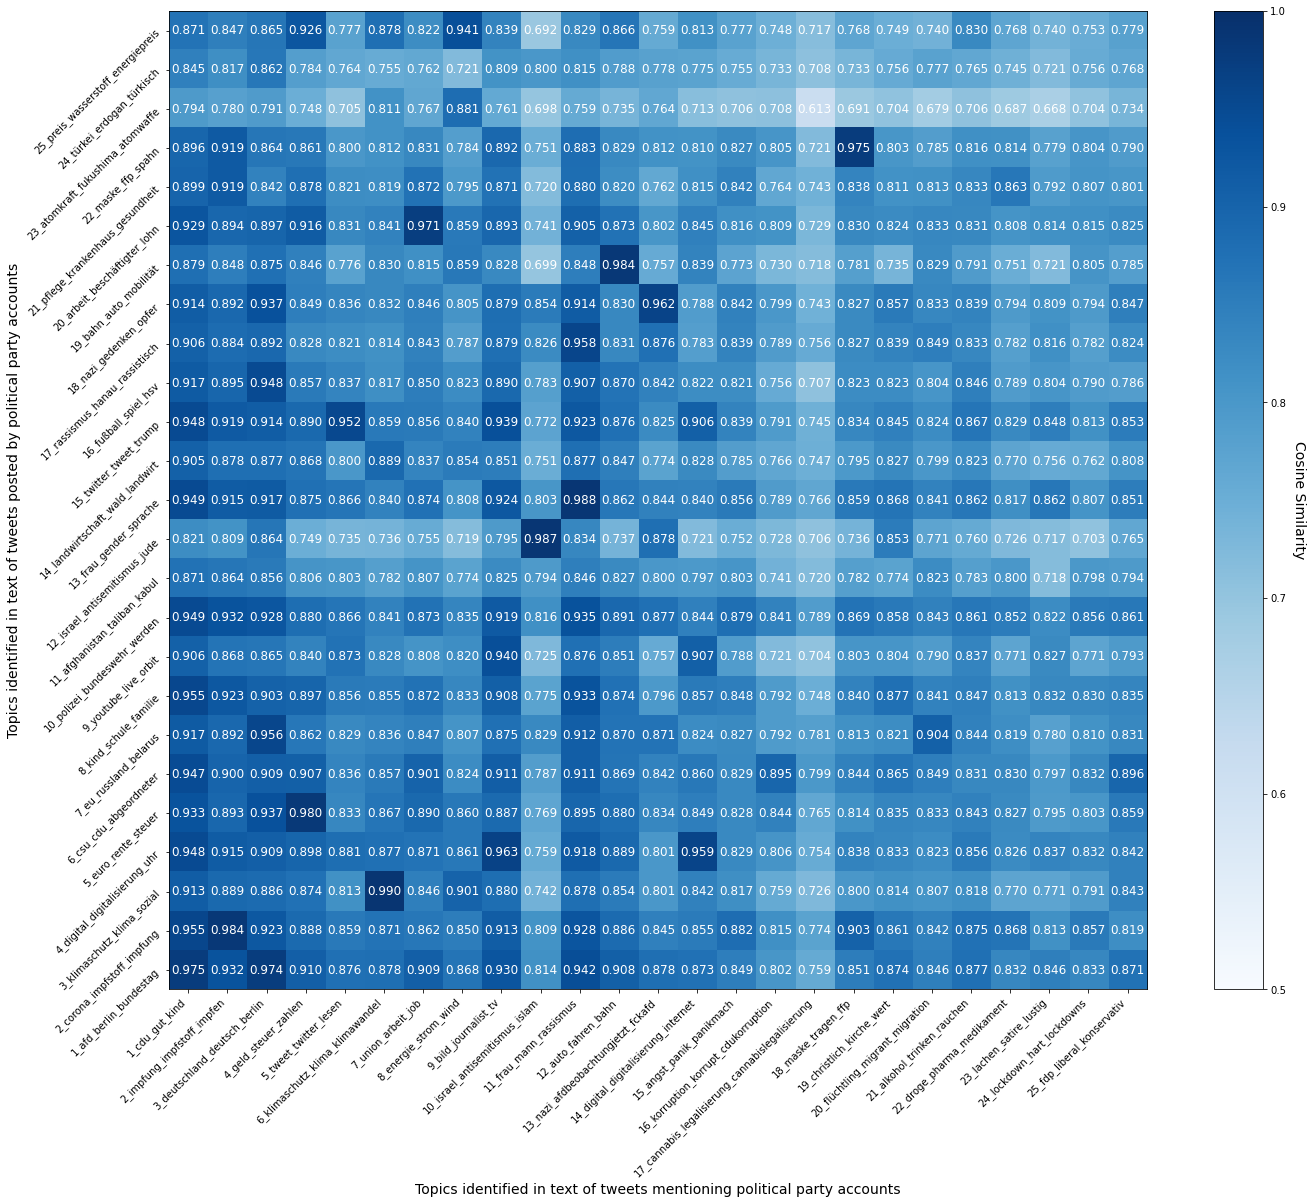

In [15]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(24, 18))
vmin = 0.5
vmax = 1.0  
plt.imshow(sim_matrix, cmap='Blues', interpolation='nearest', extent=[0.5, sim_matrix.shape[1] + 0.5, 0.5, sim_matrix.shape[0] + 0.5], vmin=vmin, vmax=vmax)

xtick_positions = np.arange(1, sim_matrix.shape[1] + 1, 1)
plt.xticks(xtick_positions, x_topic_names, rotation=45, ha='right')

ytick_positions = np.arange(1, sim_matrix.shape[1] + 1, 1)
plt.yticks(ytick_positions, y_topic_names, rotation=45, ha='right')

highest_similarities = np.argmax(sim_matrix, axis=1)

# Annotate the values from sim_matrix onto the heatmap
for i in range(sim_matrix[::-1, :].shape[0]):
    for j in range(sim_matrix[::-1, :].shape[1]):
        plt.text(j + 1, i + 1, f'{sim_matrix[::-1, :][i, j]:.3f}', ha='center', va='center', color='white', fontsize=12)

cbar = plt.colorbar()
cbar.set_label('Cosine Similarity', rotation=-90, labelpad=20, fontsize=14)

#plt.title('Cosine Similarity Matrix - ' + comparison_title)
plt.ylabel(f'Topics identified in text of tweets posted by political party accounts', fontsize=14)
plt.xlabel(f'Topics identified in text of tweets mentioning political party accounts', fontsize=14)

plt.show()

In [16]:
plt.savefig(comparison_path + '.svg', format='svg')

<Figure size 432x288 with 0 Axes>

In [17]:
plt.show()